# 梯度下降和反向传递



## `requires_grad` 的实验
假设这样一个条件

$$
\begin{align}
& o = \frac{1}{4} \sum_{i} z_i \\
& z_i = 3(x_i + 2)^2 \\
& 其中， \\
& z_i|_{x_i=1} = 27
\end{align}
$$

In [3]:
import torch
x = torch.ones(2,2,requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [5]:
y = x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [7]:
z = y * y * 3
z

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

In [9]:
out=z.mean()
out

tensor(27., grad_fn=<MeanBackward0>)

每次运算都会修改grad_fn的属性，用来记录做过的操作。

In [10]:
out.backward()

在最后这个结果是标量的时候，`backward()`不需要参数，但是如果是一个向量，则需要其他参数，不过在很多时候损失函数都是一个标量。

backword()是累加，不是覆盖，每次调用之前记得设置目标的grad为0

In [11]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [12]:
y.grad

C:\Users\cdrb1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:482.)
  return self._grad


## torch实现线性回归

In [58]:
import torch
import numpy as np
from matplotlib import pyplot as plt

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

### 准备数据

In [55]:
x = torch.rand([50], device=device)
y = 3 * x + 8
y

tensor([ 9.2245,  9.6784,  8.8604,  8.4057,  8.9114,  9.1224,  8.7361,  8.5277,
         8.4807,  8.1940,  8.8062, 10.0804,  9.7034, 10.8651,  8.3505,  9.9070,
         8.3907,  9.5161,  8.0292,  8.4808,  9.4552,  8.3662,  8.8249,  8.1966,
        10.4756, 10.1006,  9.6287,  9.9387, 10.5593,  9.9790,  8.5530,  8.3050,
         8.4412,  9.8220,  8.0103,  8.2450, 10.2666,  9.9096, 10.3724,  9.2718,
        10.9127,  9.2749, 10.6743,  8.4980, 10.4333,  9.9714,  9.7771, 10.1253,
         9.9954, 10.8638])

In [56]:
w = torch.rand(1, requires_grad=True, device=device)
b = torch.rand(1, requires_grad=True, device=device)

In [26]:
def loss_fn(y, y_predict):
    loss = (y_predict - y).pow(2).mean()
    for i in [w, b]:
        if i.grad is not None:
            i.grad.data.zero_()
    loss.backward()
    return loss.data

In [28]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

### 计算预测值

In [57]:
for i in range(3000):
    y_predict = x * w + b
    loss = loss_fn(y, y_predict)
    if i % 500 == 0:
        print(i, loss)

    optimize(0.01)

0 tensor(82.2564)
500 tensor(0.0112)
1000 tensor(0.0029)
1500 tensor(0.0007)
2000 tensor(0.0002)
2500 tensor(4.8027e-05)


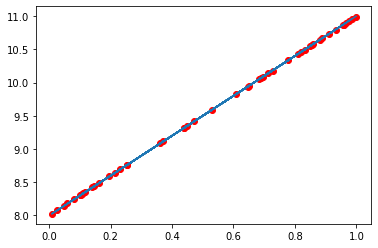

In [40]:
predict = x * w + b
plt.scatter(x.cpu().data.numpy(), y.cpu().data.numpy(), c = "r")
plt.plot(x.cpu().data.numpy(), predict.cpu().data.numpy())
plt.show()

In [41]:
print(w, b)

tensor([3.0100], device='cuda:0', requires_grad=True) tensor([7.9943], device='cuda:0', requires_grad=True)
